# Introduction to the BigEarthNet dataset
> A look at the new BigEarthNet dataset, based on sentinel-2 multispectral images.

- toc: true
- hide: false
- badges: true
- comments: true
- categories: images

# About
In the previous post, [understanding spectral reflectance](https://kai-tub.github.io/master-thesis-blog/images/2020/10/14/understanding-spectral-reflectance.html), we saw that objects can be differetiated by their surface reflectance. The surface reflectance can be sensed as multi-spectral images from satellites. In the following post, we will examine the Sentinel-2 mission and the resulting data. Afterwards, we will review an example remote sensing dataset, BigEarthNet.

## Sentinel-2 mission
[Sentinel-2](https://en.wikipedia.org/wiki/Sentinel-2) is an earth-observation mission and consists of two satellites
Sentinel-2A and Sentinel-2B. Both of which are operated by the European Space Agency ([ESA](https://en.wikipedia.org/wiki/European_Space_Agency)). The mission is to gather multi-spectral data for climate change, agriculture monitoring and emergency management. The data is published under a free and open data policy, which makes it valuable for academic purposes.

<figure>
        <div>
            <figure>
<img src="2020-10-28/Sentinel-2.jpeg" alt="Picture of a Sentinel-2 satellite">
            </figure>
        </div>
    <figcaption><center>Fig 1: A Sentinel-2 satellite<a href="https://www.satimagingcorp.com/satellite-sensors/other-satellite-sensors/sentinel-2a/">(Image from Satellite Imaging Corporation)</a></center></figcaption>
</figure>

With both satellites and their large field of view (290km) most of the earths landcover can be sensed every 5 days. 
The revisit frequency is also called the temporal resolution.
The spatial resolution is reported as $XX\,\text{m}$, which refers to the length and height of a pixel. So a resolution of 10m would correspond to a single pixel capturing an area of 10m x 10m, or 100m². An example remote sensing image can be seen in the following figure. The Sentinel-2 satellites have a spatial resolution of 10m (four visible and near-infrared), 20m (six red edge and shortwave infrared), and 60m (three atmospheric correction) bands. {% cite Sentinel2SpatialResolution %}

<figure>
        <div>
            <figure>
<img src="2020-10-28/landsat-resolution.jpg" alt="Visualization of spatial resolution with 30m band">
            </figure>
        </div>
    <figcaption><center>Example remote sensing image with a 30m spatial resolution (<a href="http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson3-1/resolution.html#:~:text=Spatial%20resolution%20is%20usually%20reported,side%20of%20a%20single%20pixel.&text=In%20other%20words%2C%20an%20image,that%20is%2030%20meters%20across.">Image from GSP Humboldt</a>)</center></figcaption>
</figure>

In total, thirteen bands are sensed ranging from the visible/near-infrared (VNIR), to the short-wave infrared (SWIR) spectrum. Each band has a *color-depth* of 12-bits, or as it is commonely referred to in the remote image sensing community, a *radiometric resolution* of 12-bits. {% cite Sentinel2RadiometricResolution %} The term *radiometric resolution* is more fitting as these multispectral images cannot be visualized with our *normal RGB colors*{% fn 1 %}.

The following figure shows all thirteen bands grouped by their spatial resolution.
ESA introduced Band _8A_ in the Sentinel-2 mission as band 08 was too contaminated by water vapour and too insensitive to other parameters for some applications. But, the original sensor for band 08 remained in the sensory equipment. 
The narrowness of band 8A should make the results less noisy towards water vapour, but still be wide enough for most applications {% cite Sentinel2Heritage %}.

In [2]:
# hide
import numpy as np
import pandas as pd
import altair as alt

# https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/radiometric
# Usage from http://esamultimedia.esa.int/multimedia/publications/SP-1322_2/offline/download.pdf
sentinel_band_data = pd.DataFrame([
    {
        "Band": "02",
        "Central Wavelength": 492,
        "Bandwidth": 66,
        "Spatial Resolution": "10m",
        "Usage": "Blue Channel (RGB)",
        "Color": "navy"
    },
    {
        "Band": "03",
        "Central Wavelength": 560,
        "Bandwidth": 36,
        "Spatial Resolution": "10m",
        "Usage": "Green Channel (RGB)",
        "Color": "green"
    },
    {
        "Band": "04",
        "Central Wavelength": 665,
        "Bandwidth": 31,
        "Spatial Resolution": "10m",
        "Usage": "Red Channel (RGB)",
        "Color": "red"
    },
    {
        "Band": "08",
        "Central Wavelength": 833,
        "Bandwidth": 106,
        "Spatial Resolution": "10m",
        "Usage": "Vegetation Red-Edge",
        "Color": "darkred"
    },
    {
        "Band": "05",
        "Central Wavelength": 704,
        "Bandwidth": 15,
        "Spatial Resolution": "20m",
        "Usage": "Vegetation Red-Edge",
        "Color": "salmon"
    },
    {
        "Band": "06",
        "Central Wavelength": 740,
        "Bandwidth": 15,
        "Spatial Resolution": "20m",
        "Usage": "Vegetation Red-Edge",
        "Color": "lightcoral"
    },
    {
        "Band": "07",
        "Central Wavelength": 780,
        "Bandwidth": 20,
        "Spatial Resolution": "20m",
        "Usage": "Vegetation Red-Edge",
        "Color": "palevioletred"
    },
    {
        "Band": "08a",
        "Central Wavelength": 865,
        "Bandwidth": 21,
        "Spatial Resolution": "20m",
        "Usage": "Vegetation Red-Edge",
        "Color": "indianred"
    },
    {
        "Band": "11",
        "Central Wavelength": 1612,
        "Bandwidth": 91,
        "Spatial Resolution": "20m",
        "Usage": "Snow/Ice/Cloud Discrimination",
        "Color": "gray"
    },
    {
        "Band": "12",
        "Central Wavelength": 2195,
        "Bandwidth": 175,
        "Spatial Resolution": "20m",
        "Usage": "Snow/Ice/Cloud Discrimination",
        "Color": "darkgray"
    },
    {
        "Band": "01",
        "Central Wavelength": 443,
        "Bandwidth": 21,
        "Spatial Resolution": "30m",
        "Usage": "Aerosols",
        "Color": "lightblue"
    },
    {
        "Band": "09",
        "Central Wavelength": 944,
        "Bandwidth": 20,
        "Spatial Resolution": "30m",
        "Usage": "Water-Vapour",
        "Color": "lightsteelblue"
    },
    {
        "Band": "10",
        "Central Wavelength": 1375,
        "Bandwidth": 31,
        "Spatial Resolution": "30m",
        "Usage": "Cirrus",
        "Color": "lightgray"
    },
]).sort_values("Band", ignore_index=True)

In [3]:
#collapse
alt.Chart(sentinel_band_data).mark_rect().encode(
    x=alt.X("start:Q", title="Wavelength in nm"),
    x2="end:Q",
#     color=alt.Color("Band", scale=alt.Scale(scheme="category20")),
    color=alt.Color("Color", scale=None),
    tooltip=[
        alt.Tooltip("Band:O", title="Band"),
        alt.Tooltip("Usage"), 
        alt.Tooltip("Central Wavelength"),
        alt.Tooltip("Spatial Resolution"), 
    ]
).transform_calculate(
    start="datum['Central Wavelength'] - 1/2 * datum['Bandwidth']",
    end="datum['Central Wavelength'] + 1/2 * datum['Bandwidth']"
).properties(
    height=100,
    width=600
).facet(
    row="Spatial Resolution"
)

alt.FacetChart(...)

Everyone can register on [scihub.copernicus.eu](https://scihub.copernicus.eu/) and search for remote sensing imagery.
The images, also called tiles or granules, from the Sentinel-2 mission sense an area of 100km² and are approximately 600MB in size. {% cite Sentinel2Products %} The copernicus program provides two types of data for public usage: 
- L2A (Level 2A with atmospheric correction)
- L1C (Level 1C without atmospheric correction)

Applying atmospheric correction algorithms tranform a so called TOA (Top Of Atmosphere) to a BOA (Bottom Of Atmosphere) image.
If one is interesting in the surface reflectance values, or more generally on the objects on the ground, the L2A data should be preferred. In case of missing L2A data, the [Sentinel-2 toolbox](https://earth.esa.int/web/sentinel/toolboxes/sentinel-2) can be used to generate L2A from L1C images.

<figure>
    <div style="display: flex; flex-wrap: wrap; justify-content: center">
        <div>
            <figure id="Fig2a">
<img src="2020-10-28/T59GPP_20200119T222541_TCI.jpg" alt="Sentinel-2 example image (true color)">
            <figcaption><center>a) True color image</center></figcaption>
            </figure>
        </div>
        <div>
            <figure id="Fig2b">
<img src="2020-10-28/T59GPP_20200119T222541_FalseColor.jpg" alt="Sentinel-2 example image (false color)">
            <figcaption><center>b) False color composition</center></figcaption>
            </figure>
        </div>
    </div>
    <figcaption><center>Fig 2: Sentinel-2 example image</center></figcaption>
</figure>

<a href="#Fig2a">Fig. 2a</a> shows the visible bands of a randomly selected image with low cloud coverage. Remote sensing images that show the visible bands, like classic RGB images, are called _True color images_ (TCI).
To visualize the data from the other bands one can:
1. Show each band indepedently as a grayscale image
2. Map three bands to the classic _RGB_ channels of an image (called false color image/composite)

<a href="#Fig2b">Fig. 2b</a> shows a popular false color composite, using the bands 08, 04, and 03.
With the band in the near-infrared spectrum (band 08) as the *red* channel the healthy green vegetation will light up in bright red. As the bare soil has a low reflectance in the near-infrared spectrum, it will range from tan to turquoise.
With the [EO Browser](https://apps.sentinel-hub.com/eo-browser/?zoom=10&lat=41.89972&lng=12.49969&themeId=DEFAULT-THEME) you can interact with satellite imagery and false color composites without requiring you to download any images or applying transformations on different spectral bands.

> Note: I highly recommend to play around with the [EO Browser](https://apps.sentinel-hub.com/eo-browser/?zoom=10&lat=41.89972&lng=12.49969&themeId=DEFAULT-THEME) as it is the easiest way to interact with the various bands.

To get the most of the high-volume data from remote sensing images, one can employ deep-learning.
Deep-learning has become the state-of-the-art solution to complex computer vision applications.
Usually, deep-learning models are used on classic RGB images, but they seem to be promising for these multi-spectral images as well. To train and test these models, researches need large, high quality datasets.
Which was not a problem, thanks to the open data policy of the Sentinel-2 imagery.
Sumbul *et. al* {% cite Sumbul2019 %} were able to assemble and published such a dataset, [BigEarthNet](http://bigearth.net/).

## BigEarthNet
The BigEarthNet archive uses Sentinel-2 tiles that are distributed over 10 countries from Europe {% fn 2 %}.
Only tiles with a cloud cover percentage under 1% containing no missing/faulty pixels were considered. The tiles were then split into smaller non-overlapping patches for further processing and publication.
In total, the dataset consists of 590,326 patches, each of which covers a region of 1.200m x 1.200m.
Due to the different spatial resolution of the various bands, the patches have different sizes. 120 x 120 pixels for 10m bands, 60 x 60 pixels for 20m bands, and 20 x 20 pixels for 60m bands.

As the archive is based on Sentinel-2 images, the radiometric resolution is 12-bits (converted to 16-bits integers).
The time-frame for the aquisition dates were between June 2017 $-$ June 2018. Due to the winter months generally having
higher cloud coverages, the winter season has the fewest samples, as seen in the following chart.

In [4]:
#collapse
season_data = pd.DataFrame([
    {"Season": "Autumn", "# Images": 154_943},
    {"Season": "Winter", "# Images": 117_156},
    {"Season": "Spring", "# Images": 189_276},
    {"Season": "Summer", "# Images": 128_951},
])

alt.Chart(season_data).mark_bar().encode(
    x="Season",
    y="# Images",
    tooltip=[
        alt.Tooltip("Season"),
        alt.Tooltip("# Images"), 
    ],
).properties(
    width=300
)

alt.Chart(...)

The authors identified [70,987 patches](http://bigearth.net/#downloads) that are fully covered by clouds, cloud shadows, and seasonal snow. They provide CSV files to exclude these patches if desired and recommend to do so if neural networks are only trained on the BigEarthNet dataset.

The last point to note is that not all bands are used in this dataset; band 10 is omitted. Band 10 does not include any surface level information, as it is mainly used to detect cirrus clouds {% cite Sentinel2CloudMasks %}. These clouds form at high altitude and are transparent or semi-transparent in the optical bands, but have a high impact on the _original_ spectral reflectance {% cite Qiu2020 %}. For the data preprocessing step the 10th band is a significant indicator of the data quality but does not hold any information for down-stream processes. However, the other 60m bands used for atmospheric correction were not removed.

With that said, we have covered all the important details of the BigEarthNet archive. But, before we move on and use the dataset, let's take a short recap.

## Summary

The most important features of the Sentinel-2 earth-observation mission are:
- 2 satellites (Sentinel-2A/Sentinel-2B)
- Temporal resolution of 5 days
- Spatial resolution of 10m, 20m, and 30m (depending on the specific band)
- Radiometric resolution of 12-bits (converted to 16-bits)
- Senses 13 bands, from the visible/near-infrared to the short-wave infrared spectrum
- Open data policy

Thanks to the open data policy researches were able to create _BigEarthNet_, a large, freely available multi-spectral dataset for deep-learning. The significant properties are:
- Provides ~590,000 patches
    - Each patch covers a region of 1.200m x 1.200m
- Various resolutions defined by Sentinel-2 specs
- Does not include band 10, as it does not contain surface level information
- Provides CSV with all _uninformative_ patches (patch with only snow/clouds)

## References

{% bibliography --cited_in_order %}

{{ 'For better usability, these 12-bit values are converted to the more commonly used 16-bit values.' | fndetail: 1 }}

{{ 'These 10 countries are: Austria, Belgium, Finland, Ireland, Kosovo, Lithuania, Luxembourg, Portugal, Serbia, Switzerland' | fndetail: 2 }}

Min val: 39	Max val: 4089


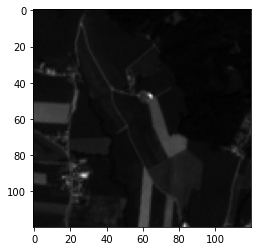

In [1]:
#hide
%matplotlib inline
import rasterio
from rasterio.plot import show
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

band_names = ['B01', 'B02', 'B03', 'B04', 'B05',
              'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12']

test_patch = "S2A_MSIL2A_20170613T101031_83_58"

test_band = "B02"
with rasterio.open(
    f"2020-10-28/{test_patch}/{test_patch}_{test_band}.tif"
) as src:
    # read the band data
    data = src.read(1)
    # imshow will automatically normalize data between 0 .. 1
    # with min-value=0 and max-value = 1 where
    # plt.imshow(data, cmap="gray") is identical to
    plt.imshow(data, cmap="gray", vmin=data.min(), vmax=data.max())
    print(f"Min val: {data.min()}\tMax val: {data.max()}")
    plt.show()
    # for cmap data
    # but shows almost no values for the original range
    # plt.imshow(data, vmin=0, vmax=2**16, cmap="gray")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


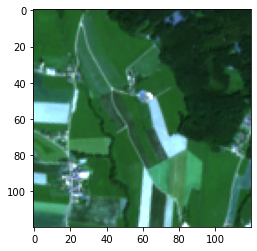

In [10]:
#hide
bands = ["B02", "B03", "B04"]
arrays_l = []
for band in bands:
    with rasterio.open(
        f"2020-10-28/{test_patch}/{test_patch}_{band}.tif"
    ) as src:
        arrays_l.append(src.read(1))
    data = np.stack(arrays_l, axis=-1)

# norm_data = (data - data.min()) / (data.max() - data.min())
# norm_data = (data - 1) / (10_000 - 1)
# norm_data = data / 2**12

# specification after: https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/definitions
# norm_data = np.clip(data / 2_000, a_min=0, a_max=1)
# plt.imshow(norm_data)
plt.imshow(data * 2.5 / 2**12)
plt.show()